In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-complaint-analysis/final_dataframe (1).csv
/kaggle/input/bank-customer-complaint-analysis/complaints.csv
/kaggle/input/bank-customer-complaint-analysis/Bank Customer Complaint Analysis for Efficient Dispute Resolution.ipynb
/kaggle/input/bank-customer-complaint-analysis/complaints_report_20240226_183305.txt


In [2]:
df = pd.read_csv('/kaggle/input/bank-customer-complaint-analysis/complaints.csv')

# Data Cleaning and Understanding

In [3]:
df.head(5)

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [4]:
df.shape

(162421, 3)

In [5]:
df.isnull().sum()

Unnamed: 0     0
product        0
narrative     10
dtype: int64

In [6]:
df.dropna()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...
...,...,...,...
162416,162416,debt_collection,name
162417,162417,credit_card,name
162418,162418,debt_collection,name
162419,162419,credit_card,name


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  162421 non-null  int64 
 1   product     162421 non-null  object
 2   narrative   162411 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


# **Data preprocessing & EDA**

In [8]:
df.rename(columns={'Unnamed: 0': 'Complaint_No'}, inplace=True)


In [9]:
df.head(5)

,Complaint_No,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [10]:
unique = df['product'].unique()
unique

array(['credit_card', 'retail_banking', 'credit_reporting',
       'mortgages_and_loans', 'debt_collection'], dtype=object)

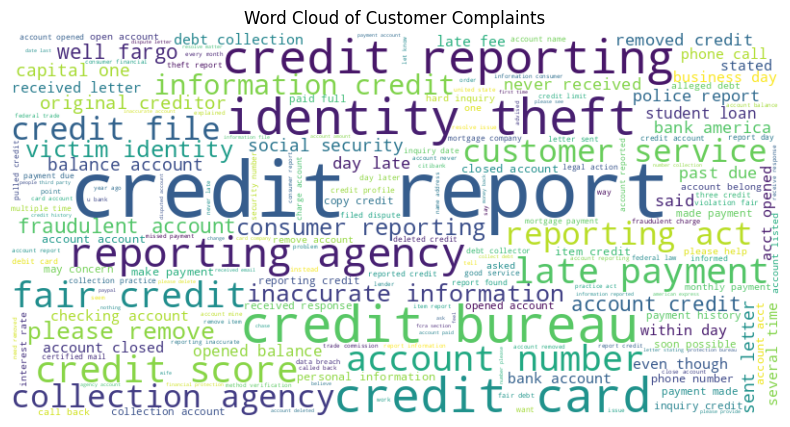

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df.dropna(subset=['narrative'])

# Ensure all entries in the 'narrative' column are strings
df['narrative'] = df['narrative'].astype(str)

# Combine all narratives into one text
all_narratives = ' '.join(df['narrative'])


from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

stop_words = set(stopwords.words('english') + list(string.punctuation))
processed_text = ' '.join([word for word in all_narratives.lower().split() if word not in stop_words])

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(processed_text)

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of Customer Complaints")
plt.axis('off')
plt.show()


### Analysis

 Words like credit report,credit card,credit score, credit bureau, reporting agency , fair credit are appearing more frequenthly in complaints which shows taht customers has huge grievances with respect to crerdit functioning.

### Distribution of Complaint by product

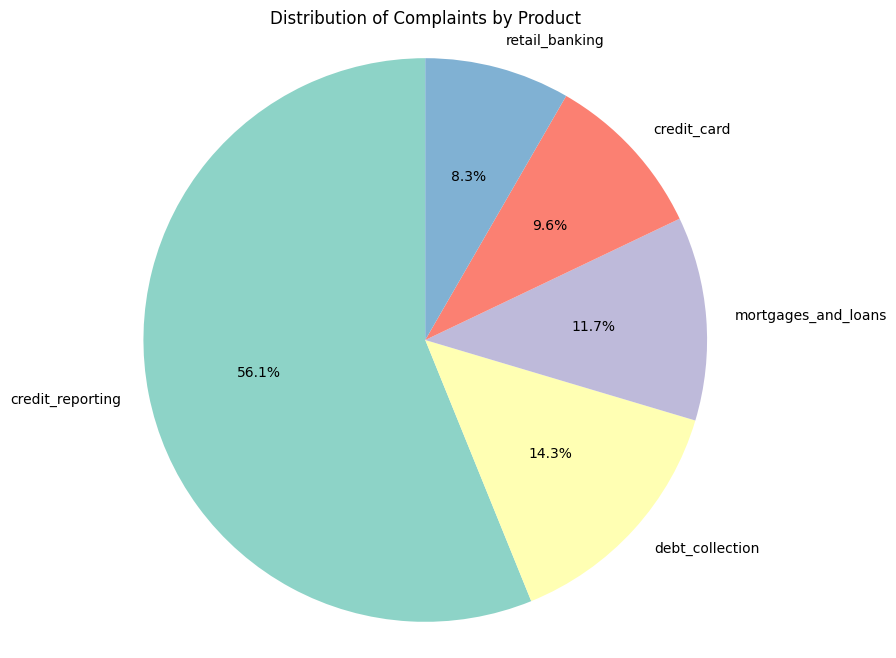

In [12]:
# Get the value counts for the 'product' column
product_counts = df['product'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(product_counts)))
plt.title('Distribution of Complaints by Product')
plt.axis('equal')  
plt.show()


**Credit reporting has highest number of complaints while retail banking has lowest number of complaints**

### Identify Relevant Words in Complaints

In [13]:
import pandas as pd
import re
from nltk.corpus import stopwords
from collections import Counter


def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphabetic characters (except spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    return text

# Fill NaN values with empty string
df['narrative'] = df['narrative'].fillna('')

# Apply text preprocessing
df['processed_narrative'] = df['narrative'].apply(preprocess_text)

# Remove stopwords (optional)
stop_words = set(stopwords.words('english'))

# Tokenize narratives and remove stopwords
df['processed_tokens'] = df['processed_narrative'].apply(
    lambda text: [word for word in text.split() if word not in stop_words]
)

# Find most common words for each product
product_issues = df.groupby('product')['processed_tokens'].apply(
    lambda narratives: Counter([word for tokens in narratives for word in tokens]).most_common(5)
)

# Display the result
print(product_issues)


product
credit_card            [(card, 37861), (credit, 33268), (account, 285...
credit_reporting       [(credit, 224547), (account, 188590), (report,...
debt_collection        [(debt, 42663), (credit, 39201), (account, 344...
mortgages_and_loans    [(payment, 47361), (loan, 44211), (mortgage, 2...
retail_banking         [(account, 45472), (bank, 26096), (money, 1597...
Name: processed_tokens, dtype: object


**Output:**

Credit Card: The most frequent words are "card", "credit", and "account" with respective frequencies of 37,861, 33,268, and 28,511.

Credit Reporting: The most frequent words are "credit", "account", and "report" with respective frequencies of 224,547, 188,590, and 105,765.

Debt Collection: The most frequent words are "debt", "credit", and "account" with respective frequencies of 42,663, 39,201, and 34,411.

Mortgages and Loans: The most frequent words are "payment", "loan", and "mortgage" with respective frequencies of 47,361, 44,211, and 32,110.

Retail Banking: The most frequent words are "account", "bank", and "money" with respective frequencies of 45,472, 26,096, and 1,597

# Sentiment Analysis

In [14]:
from textblob import TextBlob

# Sentiment analysis on 'narrative'
df['sentiment'] = df['narrative'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment into Positive, Negative, and Neutral
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment'].apply(classify_sentiment)

# Display the updated DataFrame
df


,Complaint_No,product,narrative,processed_narrative,processed_tokens,sentiment,sentiment_label
0,0,credit_card,purchase order day shipping amount receive pro...,purchase order day shipping amount receive pro...,"[purchase, order, day, shipping, amount, recei...",0.050780,Positive
1,1,credit_card,forwarded message date tue subject please inve...,forwarded message date tue subject please inve...,"[forwarded, message, date, tue, subject, pleas...",-0.030279,Negative
2,2,retail_banking,forwarded message cc sent friday pdt subject f...,forwarded message cc sent friday pdt subject f...,"[forwarded, message, cc, sent, friday, pdt, su...",-0.009483,Negative
3,3,credit_reporting,payment history missing credit report speciali...,payment history missing credit report speciali...,"[payment, history, missing, credit, report, sp...",0.075909,Positive
4,4,credit_reporting,payment history missing credit report made mis...,payment history missing credit report made mis...,"[payment, history, missing, credit, report, ma...",0.075909,Positive
...,...,...,...,...,...,...,...
162416,162416,debt_collection,name,name,[name],0.000000,Neutral
162417,162417,credit_card,name,name,[name],0.000000,Neutral
162418,162418,debt_collection,name,name,[name],0.000000,Neutral
162419,162419,credit_card,name,name,[name],0.000000,Neutral


### Bar chart to show the counts of Positive, Negative, and Neutral sentiments

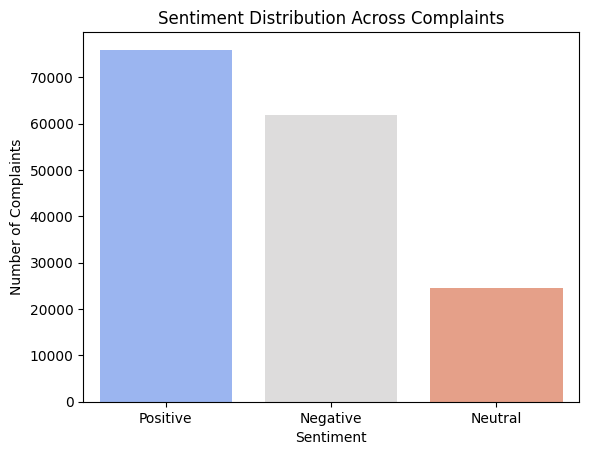

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize sentiment distribution
sns.countplot(x='sentiment_label', data=df, palette='coolwarm')
plt.title('Sentiment Distribution Across Complaints')
plt.xlabel('Sentiment')
plt.ylabel('Number of Complaints')
plt.show()


### Sentiment distribution by product categories

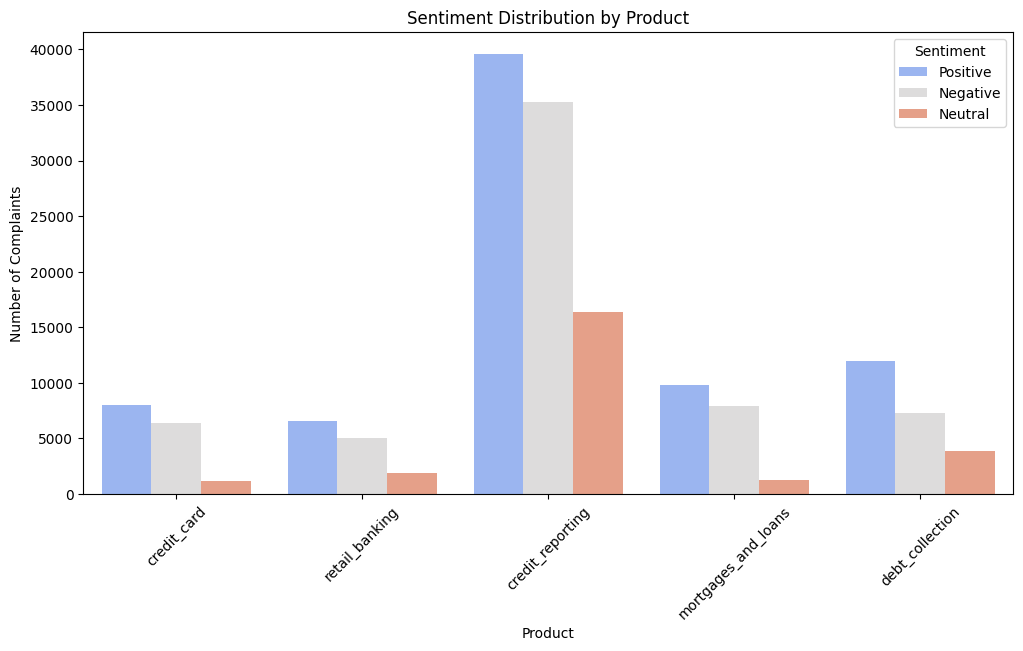

In [16]:
# Visualize sentiment by product
plt.figure(figsize=(12, 6))
sns.countplot(x='product', hue='sentiment_label', data=df, palette='coolwarm')
plt.title('Sentiment Distribution by Product')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()


## **Sentiment Analysis Interpretation**

### **Credit Reporting**
- **Observation**: Credit reporting has the highest number of negative sentiments.
- **Possible Causes**:  
  - Frequent inaccuracies in credit reports.  
  - Missing payment histories or unresolved disputes.  
  - Lack of transparency in report updates.  

- **Business Implication**:  
  - High negative sentiment in this category reflects dissatisfaction with the reliability and transparency of credit information.  
  - Such issues can damage customer trust, potentially leading to higher churn rates and reputational harm.  

- **Recommendations**:  
  - Invest in automated credit report verification systems.  
  - Provide customers with regular updates and detailed explanations of discrepancies.  
  - Improve customer support for faster resolution of credit-related disputes.  

---

### **Mortgages and Loans**
- **Observation**: Mortgages and loans rank second in negative sentiments.  
- **Possible Causes**:  
  - Payment processing errors.  
  - Delayed loan approvals.  
  - Poor communication regarding loan terms.  

- **Business Implication**:  
  - Delayed processes can erode customer satisfaction and create operational inefficiencies.  
  - Payment-related issues might increase loan defaults, impacting overall profitability.  

- **Recommendations**:  
  - Optimize payment systems with automation and reminders.  
  - Simplify loan terms to reduce misunderstandings.  
  - Enhance customer education about loan agreements.  

---

### **Debt Collection**
- **Observation**: Debt collection stands third in negative sentiments.  
- **Possible Causes**:  
  - Aggressive or unethical debt recovery practices.  
  - Lack of clarity in repayment plans.  
  - Poor customer service during debt resolution processes.  

- **Business Implication**:  
  - Negative perceptions around debt collection may tarnish brand reputation.  
  - Customers with poor experiences may resist future business engagements.  

- **Recommendations**:  
  - Train staff to adopt ethical and empathetic collection practices.  
  - Simplify and communicate repayment plans clearly.  
  - Offer flexible options for customers facing genuine difficulties.  

---

### **Overall Insights**
The data highlights critical pain points in customer experiences with financial products. Addressing these issues systematically can significantly enhance customer trust, operational efficiency, and the company’s reputation.


In [17]:
df_encoded = pd.get_dummies(df['product'])
df = pd.concat([df,df_encoded],axis=1)
df.head(5)

,Complaint_No,product,narrative,processed_narrative,processed_tokens,sentiment,sentiment_label,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,credit_card,purchase order day shipping amount receive pro...,purchase order day shipping amount receive pro...,"[purchase, order, day, shipping, amount, recei...",0.050780,Positive,True,False,False,False,False
1,1,credit_card,forwarded message date tue subject please inve...,forwarded message date tue subject please inve...,"[forwarded, message, date, tue, subject, pleas...",-0.030279,Negative,True,False,False,False,False
2,2,retail_banking,forwarded message cc sent friday pdt subject f...,forwarded message cc sent friday pdt subject f...,"[forwarded, message, cc, sent, friday, pdt, su...",-0.009483,Negative,False,False,False,False,True
3,3,credit_reporting,payment history missing credit report speciali...,payment history missing credit report speciali...,"[payment, history, missing, credit, report, sp...",0.075909,Positive,False,True,False,False,False
4,4,credit_reporting,payment history missing credit report made mis...,payment history missing credit report made mis...,"[payment, history, missing, credit, report, ma...",0.075909,Positive,False,True,False,False,False


In [18]:
df = df.drop('product', axis=1)
df.head()


,Complaint_No,narrative,processed_narrative,processed_tokens,sentiment,sentiment_label,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,purchase order day shipping amount receive pro...,purchase order day shipping amount receive pro...,"[purchase, order, day, shipping, amount, recei...",0.050780,Positive,True,False,False,False,False
1,1,forwarded message date tue subject please inve...,forwarded message date tue subject please inve...,"[forwarded, message, date, tue, subject, pleas...",-0.030279,Negative,True,False,False,False,False
2,2,forwarded message cc sent friday pdt subject f...,forwarded message cc sent friday pdt subject f...,"[forwarded, message, cc, sent, friday, pdt, su...",-0.009483,Negative,False,False,False,False,True
3,3,payment history missing credit report speciali...,payment history missing credit report speciali...,"[payment, history, missing, credit, report, sp...",0.075909,Positive,False,True,False,False,False
4,4,payment history missing credit report made mis...,payment history missing credit report made mis...,"[payment, history, missing, credit, report, ma...",0.075909,Positive,False,True,False,False,False


# **Text Preparation**

# 1.Lower case - Converted all text to lowercase to ensure uniformity

In [19]:
df["narrative"]=df["narrative"].str.lower()
df.head()


,Complaint_No,narrative,processed_narrative,processed_tokens,sentiment,sentiment_label,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,purchase order day shipping amount receive pro...,purchase order day shipping amount receive pro...,"[purchase, order, day, shipping, amount, recei...",0.050780,Positive,True,False,False,False,False
1,1,forwarded message date tue subject please inve...,forwarded message date tue subject please inve...,"[forwarded, message, date, tue, subject, pleas...",-0.030279,Negative,True,False,False,False,False
2,2,forwarded message cc sent friday pdt subject f...,forwarded message cc sent friday pdt subject f...,"[forwarded, message, cc, sent, friday, pdt, su...",-0.009483,Negative,False,False,False,False,True
3,3,payment history missing credit report speciali...,payment history missing credit report speciali...,"[payment, history, missing, credit, report, sp...",0.075909,Positive,False,True,False,False,False
4,4,payment history missing credit report made mis...,payment history missing credit report made mis...,"[payment, history, missing, credit, report, ma...",0.075909,Positive,False,True,False,False,False


# 2. Remove Html tags

In [20]:
!pip install beautifulsoup4


In [21]:
from bs4 import BeautifulSoup

def has_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return bool(soup.find())

df['has_html_tags'] = df['narrative'].apply(has_html_tags)


In [22]:
df.head()


,Complaint_No,narrative,processed_narrative,processed_tokens,sentiment,sentiment_label,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking,has_html_tags
0,0,purchase order day shipping amount receive pro...,purchase order day shipping amount receive pro...,"[purchase, order, day, shipping, amount, recei...",0.050780,Positive,True,False,False,False,False,False
1,1,forwarded message date tue subject please inve...,forwarded message date tue subject please inve...,"[forwarded, message, date, tue, subject, pleas...",-0.030279,Negative,True,False,False,False,False,False
2,2,forwarded message cc sent friday pdt subject f...,forwarded message cc sent friday pdt subject f...,"[forwarded, message, cc, sent, friday, pdt, su...",-0.009483,Negative,False,False,False,False,True,False
3,3,payment history missing credit report speciali...,payment history missing credit report speciali...,"[payment, history, missing, credit, report, sp...",0.075909,Positive,False,True,False,False,False,False
4,4,payment history missing credit report made mis...,payment history missing credit report made mis...,"[payment, history, missing, credit, report, ma...",0.075909,Positive,False,True,False,False,False,False


In [23]:
count_true = df['has_html_tags'].sum()
count_true

0

In [24]:
df = df.drop('has_html_tags', axis=1)
df

,Complaint_No,narrative,processed_narrative,processed_tokens,sentiment,sentiment_label,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,purchase order day shipping amount receive pro...,purchase order day shipping amount receive pro...,"[purchase, order, day, shipping, amount, recei...",0.050780,Positive,True,False,False,False,False
1,1,forwarded message date tue subject please inve...,forwarded message date tue subject please inve...,"[forwarded, message, date, tue, subject, pleas...",-0.030279,Negative,True,False,False,False,False
2,2,forwarded message cc sent friday pdt subject f...,forwarded message cc sent friday pdt subject f...,"[forwarded, message, cc, sent, friday, pdt, su...",-0.009483,Negative,False,False,False,False,True
3,3,payment history missing credit report speciali...,payment history missing credit report speciali...,"[payment, history, missing, credit, report, sp...",0.075909,Positive,False,True,False,False,False
4,4,payment history missing credit report made mis...,payment history missing credit report made mis...,"[payment, history, missing, credit, report, ma...",0.075909,Positive,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
162416,162416,name,name,[name],0.000000,Neutral,False,False,True,False,False
162417,162417,name,name,[name],0.000000,Neutral,True,False,False,False,False
162418,162418,name,name,[name],0.000000,Neutral,False,False,True,False,False
162419,162419,name,name,[name],0.000000,Neutral,True,False,False,False,False


# 3. remove emoji - Eliminated emojis and URLs to clean the text

In [25]:
!pip install emoji


In [26]:
!pip install --upgrade emoji


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 9.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: emoji
    Found existing installation: emoji 2.12.1
    Uninstalling emoji-2.12.1:
      Successfully uninstalled emoji-2.12.1


In [27]:
!pip install regex


In [28]:
import regex
import pandas as pd

def has_emoji(text):
    emoji_pattern = regex.compile(r'\p{Emoji}', flags=regex.UNICODE)
    return bool(emoji_pattern.search(text))


has_emojis =  df['narrative'].apply(has_emoji)

has_emojis


0         False
1         False
2         False
3         False
4         False
          ...  
162416    False
162417    False
162418    False
162419    False
162420    False
Name: narrative, Length: 162411, dtype: bool

In [29]:
has_emojis.sum()


0

# 4. remove URL's

In [30]:
import re
def remove_url(text):
    pattern=re.compile(r'https?://\S+|www\.S+')
    return pattern.sub(r'',text)
df["narrative"]=df["narrative"].apply(remove_url)

df.head()


,Complaint_No,narrative,processed_narrative,processed_tokens,sentiment,sentiment_label,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,purchase order day shipping amount receive pro...,purchase order day shipping amount receive pro...,"[purchase, order, day, shipping, amount, recei...",0.050780,Positive,True,False,False,False,False
1,1,forwarded message date tue subject please inve...,forwarded message date tue subject please inve...,"[forwarded, message, date, tue, subject, pleas...",-0.030279,Negative,True,False,False,False,False
2,2,forwarded message cc sent friday pdt subject f...,forwarded message cc sent friday pdt subject f...,"[forwarded, message, cc, sent, friday, pdt, su...",-0.009483,Negative,False,False,False,False,True
3,3,payment history missing credit report speciali...,payment history missing credit report speciali...,"[payment, history, missing, credit, report, sp...",0.075909,Positive,False,True,False,False,False
4,4,payment history missing credit report made mis...,payment history missing credit report made mis...,"[payment, history, missing, credit, report, ma...",0.075909,Positive,False,True,False,False,False


# 5- Remove puncatution¶

In [31]:
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
punc=string.punctuation


In [33]:
def remove_punc(text):
    return text.translate(str.maketrans('', '',punc))

df["narrative"]=df["narrative"].apply(remove_punc)
df.head()


,Complaint_No,narrative,processed_narrative,processed_tokens,sentiment,sentiment_label,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,purchase order day shipping amount receive pro...,purchase order day shipping amount receive pro...,"[purchase, order, day, shipping, amount, recei...",0.050780,Positive,True,False,False,False,False
1,1,forwarded message date tue subject please inve...,forwarded message date tue subject please inve...,"[forwarded, message, date, tue, subject, pleas...",-0.030279,Negative,True,False,False,False,False
2,2,forwarded message cc sent friday pdt subject f...,forwarded message cc sent friday pdt subject f...,"[forwarded, message, cc, sent, friday, pdt, su...",-0.009483,Negative,False,False,False,False,True
3,3,payment history missing credit report speciali...,payment history missing credit report speciali...,"[payment, history, missing, credit, report, sp...",0.075909,Positive,False,True,False,False,False
4,4,payment history missing credit report made mis...,payment history missing credit report made mis...,"[payment, history, missing, credit, report, ma...",0.075909,Positive,False,True,False,False,False


# 6. remove stopwords-Removed common stop words that do not contribute to the meaning

In [34]:
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

df["narrative"]=df["narrative"].apply(lambda x: remove_stopwords(x))

df.head()


,Complaint_No,narrative,processed_narrative,processed_tokens,sentiment,sentiment_label,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,purchase order day shipping amount receive pro...,purchase order day shipping amount receive pro...,"[purchase, order, day, shipping, amount, recei...",0.050780,Positive,True,False,False,False,False
1,1,forwarded message date tue subject please inve...,forwarded message date tue subject please inve...,"[forwarded, message, date, tue, subject, pleas...",-0.030279,Negative,True,False,False,False,False
2,2,forwarded message cc sent friday pdt subject f...,forwarded message cc sent friday pdt subject f...,"[forwarded, message, cc, sent, friday, pdt, su...",-0.009483,Negative,False,False,False,False,True
3,3,payment history missing credit report speciali...,payment history missing credit report speciali...,"[payment, history, missing, credit, report, sp...",0.075909,Positive,False,True,False,False,False
4,4,payment history missing credit report made mis...,payment history missing credit report made mis...,"[payment, history, missing, credit, report, ma...",0.075909,Positive,False,True,False,False,False


# 7- Tokenization - Split the text into tokens (words) to prepare for analysis.


The process of breaking down text into smaller units, called tokens. This step is essential for analyzing individual words and their frequencies.



In [36]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize, sent_tokenize

def tokenize_text(text):
    sentences = sent_tokenize(text)
    words = [word_tokenize(sentence) for sentence in sentences]
    return words

df['Complaint_tokenized_text'] = df['narrative'].apply(tokenize_text)

df.head()


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Complaint_No,narrative,processed_narrative,processed_tokens,sentiment,sentiment_label,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking,Complaint_tokenized_text
0,0,purchase order day shipping amount receive pro...,purchase order day shipping amount receive pro...,"[purchase, order, day, shipping, amount, recei...",0.050780,Positive,True,False,False,False,False,"[[purchase, order, day, shipping, amount, rece..."
1,1,forwarded message date tue subject please inve...,forwarded message date tue subject please inve...,"[forwarded, message, date, tue, subject, pleas...",-0.030279,Negative,True,False,False,False,False,"[[forwarded, message, date, tue, subject, plea..."
2,2,forwarded message cc sent friday pdt subject f...,forwarded message cc sent friday pdt subject f...,"[forwarded, message, cc, sent, friday, pdt, su...",-0.009483,Negative,False,False,False,False,True,"[[forwarded, message, cc, sent, friday, pdt, s..."
3,3,payment history missing credit report speciali...,payment history missing credit report speciali...,"[payment, history, missing, credit, report, sp...",0.075909,Positive,False,True,False,False,False,"[[payment, history, missing, credit, report, s..."
4,4,payment history missing credit report made mis...,payment history missing credit report made mis...,"[payment, history, missing, credit, report, ma...",0.075909,Positive,False,True,False,False,False,"[[payment, history, missing, credit, report, m..."


In [37]:
df["Complaint_tokenized_text"][0][0]


['purchase',
 'order',
 'day',
 'shipping',
 'amount',
 'receive',
 'product',
 'week',
 'sent',
 'followup',
 'email',
 'exact',
 'verbiage',
 'paid',
 'two',
 'day',
 'shipping',
 'received',
 'order',
 'company',
 'responded',
 'im',
 'sorry',
 'inform',
 'due',
 'unusually',
 'high',
 'order',
 'volume',
 'order',
 'shipped',
 'several',
 'week',
 'stock',
 'since',
 'early',
 'due',
 'high',
 'demand',
 'although',
 'continuing',
 'take',
 'order',
 'guaranteeing',
 'receive',
 'order',
 'place',
 'due',
 'time',
 'mask',
 'order',
 'exact',
 'shipping',
 'date',
 'right',
 'however',
 'guarantee',
 'ship',
 'soon',
 'soon',
 'delivers',
 'product',
 'u',
 'getting',
 'small',
 'shipment',
 'shipping',
 'first',
 'come',
 'first',
 'served',
 'basis',
 'appreciate',
 'patience',
 'fulfill',
 'order',
 'quickly',
 'recommend',
 'keeping',
 'order',
 'lose',
 'place',
 'line',
 'cancel',
 'distributor',
 'stock',
 'moment',
 'prefer',
 'cancel',
 'please',
 'note',
 'ask',
 'via',
 

Split data for training

In [38]:
X = df['narrative'].values
X

array(['purchase order day shipping amount receive product week sent followup email exact verbiage paid two day shipping received order company responded im sorry inform due unusually high order volume order shipped several week stock since early due high demand although continuing take order guaranteeing receive order place due time mask order exact shipping date right however guarantee ship soon soon delivers product u getting small shipment shipping first come first served basis appreciate patience fulfill order quickly recommend keeping order lose place line cancel distributor stock moment prefer cancel please note ask via email cancel accordance cancellation policy agreed checkout electronic inventory online requested order canceled refund issued canceled order sent verification order canceled refunded item particulate respirator refunded subtotal shipping tax total usd visa ending refund called disputed amount stated nothing needed submitted address issue recharged item removing 

In [39]:
y = np.argmax(df[['credit_card', 'credit_reporting', 'debt_collection', 'mortgages_and_loans', 'retail_banking']].values, axis=1)


In [40]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=42)


# TF IDF AND Naive Bayes

TF-IDF is a statistical measure that evaluates the importance of a word in a document relative to a collection of documents (corpus). It helps in transforming textual data into a format that machine learning algorithms can understand.



Naive Bayes - A probabilistic machine learning algorithm based on Bayes' theorem, used for classification tasks. It assumes independence between predictors

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

# Create a pipeline with a TF-IDF vectorizer and a Multinomial Naive Bayes classifier
model1 = make_pipeline(TfidfVectorizer(), MultinomialNB())


model1.fit(X_train, y_train)


y_pred = model1.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.59      0.68      3132
           1       0.80      0.96      0.87     18283
           2       0.86      0.44      0.58      4615
           3       0.80      0.78      0.79      3770
           4       0.90      0.73      0.81      2683

    accuracy                           0.81     32483
   macro avg       0.83      0.70      0.75     32483
weighted avg       0.82      0.81      0.80     32483



**Cross Validation**

In [42]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model1, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")


Cross-Validation Scores: [0.81008528 0.79628717 0.80503048 0.81857644 0.80629272]
Mean Accuracy: 0.81


# BOW

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
# Create a pipeline with a CountVectorizer and a Multinomial Naive Bayes classifier
model2 = make_pipeline(CountVectorizer(), MultinomialNB())


model2.fit(X_train, y_train)


y_pred = model2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.78      0.70      3132
           1       0.92      0.84      0.88     18283
           2       0.73      0.68      0.71      4615
           3       0.71      0.87      0.78      3770
           4       0.79      0.89      0.84      2683

    accuracy                           0.82     32483
   macro avg       0.76      0.81      0.78     32483
weighted avg       0.83      0.82      0.82     32483



In [44]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model2, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")

Cross-Validation Scores: [0.82135271 0.8099255  0.80355274 0.80995628 0.82005418]
Mean Accuracy: 0.81


# Confusion Matrix

A confusion matrix provides a visual representation of the performance of a classification algorithm, showing the correct and incorrect predictions made by the model.

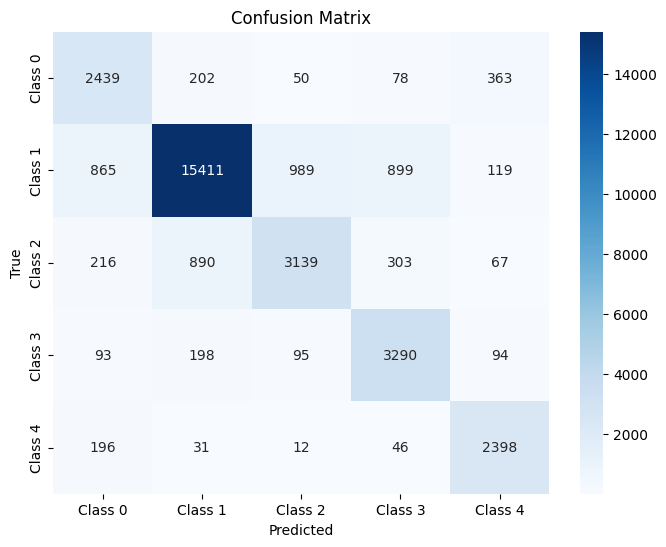

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# LSTM

In [46]:
df

,Complaint_No,narrative,processed_narrative,processed_tokens,sentiment,sentiment_label,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking,Complaint_tokenized_text
0,0,purchase order day shipping amount receive pro...,purchase order day shipping amount receive pro...,"[purchase, order, day, shipping, amount, recei...",0.050780,Positive,True,False,False,False,False,"[[purchase, order, day, shipping, amount, rece..."
1,1,forwarded message date tue subject please inve...,forwarded message date tue subject please inve...,"[forwarded, message, date, tue, subject, pleas...",-0.030279,Negative,True,False,False,False,False,"[[forwarded, message, date, tue, subject, plea..."
2,2,forwarded message cc sent friday pdt subject f...,forwarded message cc sent friday pdt subject f...,"[forwarded, message, cc, sent, friday, pdt, su...",-0.009483,Negative,False,False,False,False,True,"[[forwarded, message, cc, sent, friday, pdt, s..."
3,3,payment history missing credit report speciali...,payment history missing credit report speciali...,"[payment, history, missing, credit, report, sp...",0.075909,Positive,False,True,False,False,False,"[[payment, history, missing, credit, report, s..."
4,4,payment history missing credit report made mis...,payment history missing credit report made mis...,"[payment, history, missing, credit, report, ma...",0.075909,Positive,False,True,False,False,False,"[[payment, history, missing, credit, report, m..."
...,...,...,...,...,...,...,...,...,...,...,...,...
162416,162416,name,name,[name],0.000000,Neutral,False,False,True,False,False,[[name]]
162417,162417,name,name,[name],0.000000,Neutral,True,False,False,False,False,[[name]]
162418,162418,name,name,[name],0.000000,Neutral,False,False,True,False,False,[[name]]
162419,162419,name,name,[name],0.000000,Neutral,True,False,False,False,False,[[name]]


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

# Preprocessing
# Tokenize text data
max_words = 10000  
max_len = 100  

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df['processed_narrative'])
sequences = tokenizer.texts_to_sequences(df['processed_narrative'])
X = pad_sequences(sequences, maxlen=max_len, padding='post')

# Encode labels
label_encoder = LabelEncoder()
df['sentiment_label'] = label_encoder.fit_transform(df['sentiment_label'])
y = to_categorical(df['sentiment_label'])  # One-hot encoding

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define LSTM model
embedding_dim = 50

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(y.shape[1], activation='softmax')  
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))


2025-01-26 08:47:56.429401: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-26 08:47:56.429600: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-26 08:47:56.580466: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


3249/3249 ━━━━━━━━━━━━━━━━━━━━ 477s 146ms/step - accuracy: 0.6268 - loss: 0.7324 - val_accuracy: 0.8938 - val_loss: 0.2898
Epoch 2/5
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 473s 146ms/step - accuracy: 0.9089 - loss: 0.2511 - val_accuracy: 0.9278 - val_loss: 0.1956
Epoch 3/5
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 472s 145ms/step - accuracy: 0.9438 - loss: 0.1597 - val_accuracy: 0.9365 - val_loss: 0.1848
Epoch 4/5
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 473s 145ms/step - accuracy: 0.9554 - loss: 0.1279 - val_accuracy: 0.9418 - val_loss: 0.1707
Epoch 5/5
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 472s 145ms/step - accuracy: 0.9641 - loss: 0.1019 - val_accuracy: 0.9421 - val_loss: 0.1778
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 51s 50ms/step
              precision    recall  f1-score   support

    Negative       0.93      0.92      0.93     12361
     Neutral       0.99      0.96      0.97      4871
    Positive       0.93      0.95      0.94     15251

    accuracy                           0.94     32483
   macro avg       0.95     

In [48]:
from tensorflow.keras.models import load_model

# Save the trained LSTM model
model.save('/kaggle/working/lstm_model.h5')


In [49]:
import pickle

# Save the tokenizer
with open('/kaggle/working/tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [50]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


# 1. Encode labels
label_encoder = LabelEncoder()
df['sentiment_label'] = label_encoder.fit_transform(df['sentiment_label'])

# 2. One-hot encode the labels
y = to_categorical(df['sentiment_label'])

# 3. Save the LabelEncoder
with open('/kaggle/working/label_encoder.pkl', 'wb') as handle:
    pickle.dump(label_encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)

# 4. Save the One-Hot Encoded Labels (y)
np.save('/kaggle/working/one_hot_labels.npy', y)




# Complaint Data Analysis

The complaint data analysis across various product categories reveals distinct patterns that highlight significant areas of customer dissatisfaction. In particular:

### Credit Card
Complaints frequently center around issues related to account management, transaction discrepancies, and fraudulent charges. The words most often mentioned include 'card', 'credit', and 'account', suggesting that customers are primarily concerned with the accuracy and security of their accounts.

### Credit Reporting
Customers often report issues related to missing payment history and inaccurate credit reports. The recurrent terms 'credit', 'account', and 'report' indicate frustration with the completeness and correctness of credit information.

### Mortgages and Loans
Complaints in this category focus on payment errors, loan terms, and delayed processing. The high frequency of words like 'payment', 'loan', and 'mortgage' signals a need for improved payment processing systems and clearer loan term communications.

### Debt Collection
This category reveals customer concerns about debt collection practices, with frequent mentions of terms like 'debt', 'credit', and 'account', indicating a need for more transparent and customer-friendly debt resolution processes.


## Recommendations

### **Improve Account and Transaction Transparency**
Enhance credit card account management by offering detailed transaction histories, real-time fraud alerts, and clearer dispute resolution to reduce complaints.

### **Enhance Credit Report Accuracy**
Improve the accuracy and user-friendliness of credit reports, with better explanations of discrepancies and regular updates to foster customer trust.

### **Optimize Payment Systems**
In mortgages and loans, focus on payment accuracy, implement automated reminders, and provide clearer communication on loan terms to reduce complaints related to payment errors.

### **Streamline Debt Collection**
Recommend more transparent, ethical debt collection practices, with clearer repayment plans and improved customer service interactions.

### **AI-Driven Complaint Management**
Automate complaint categorization and analysis to identify recurring issues and proactively resolve them.
